In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [2]:
%pwd

'C:\\Users\\yassi\\PycharmProjects\\waterpurity\\notebook'

In [3]:
df = pd.read_csv("../artifacts/data_ingestion/data.csv")

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
ph,0.000000,7.036752,7.080795,14.000000,1.594320
Hardness,47.432000,196.967627,196.369496,323.124000,32.879761
Solids,320.942611,20927.833607,22014.092526,61227.196008,8768.570828
Chloramines,0.352000,7.130299,7.122277,13.127000,1.583085
Sulfate,129.000000,333.073546,333.775777,481.030642,41.416840
Conductivity,181.483754,421.884968,426.205111,753.342620,80.824064
Organic_carbon,2.200000,14.218338,14.284970,28.300000,3.308162
Trihalomethanes,0.738000,66.622485,66.396293,124.000000,16.175008
Turbidity,1.450000,3.955028,3.966786,6.739000,0.780382
Potability,0.000000,0.000000,0.390110,1.000000,0.487849


In [7]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
# Missing values percentage
round((df.isna().sum()/len(df))*100, 2)

ph                 14.99
Hardness            0.00
Solids              0.00
Chloramines         0.00
Sulfate            23.84
Conductivity        0.00
Organic_carbon      0.00
Trihalomethanes     4.95
Turbidity           0.00
Potability          0.00
dtype: float64

Too much missing values, replacing with median. We'll be splitting by Potability.

Medians are approximately equal, Potability doesn't influence these values. 

We'll ignore this filter and replace with their median

In [9]:
df['ph'] = df['ph'].fillna(value=df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(value=df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median())

In [10]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Data Visualization

Potability
0    1998
1    1278
Name: count, dtype: int64


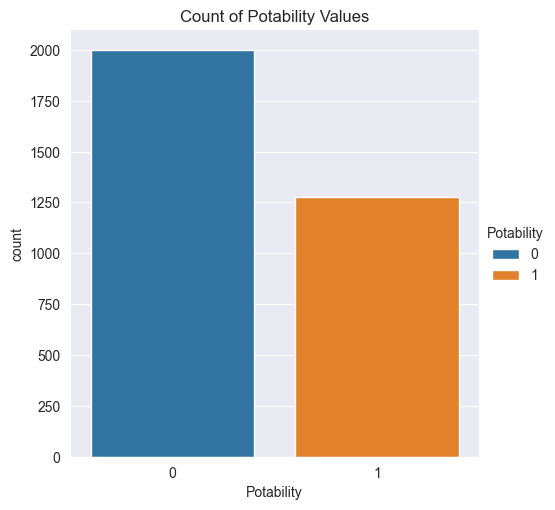

In [11]:
tar = df['Potability'].value_counts()
print(tar)


sns.catplot(
    data=df,        
    x='Potability',  
    kind='count',   
    hue= 'Potability',
    orient='v'
)

# plt.xlabel('Potability')  
# plt.ylabel('Count')       
plt.title('Count of Potability Values')   
plt.show()

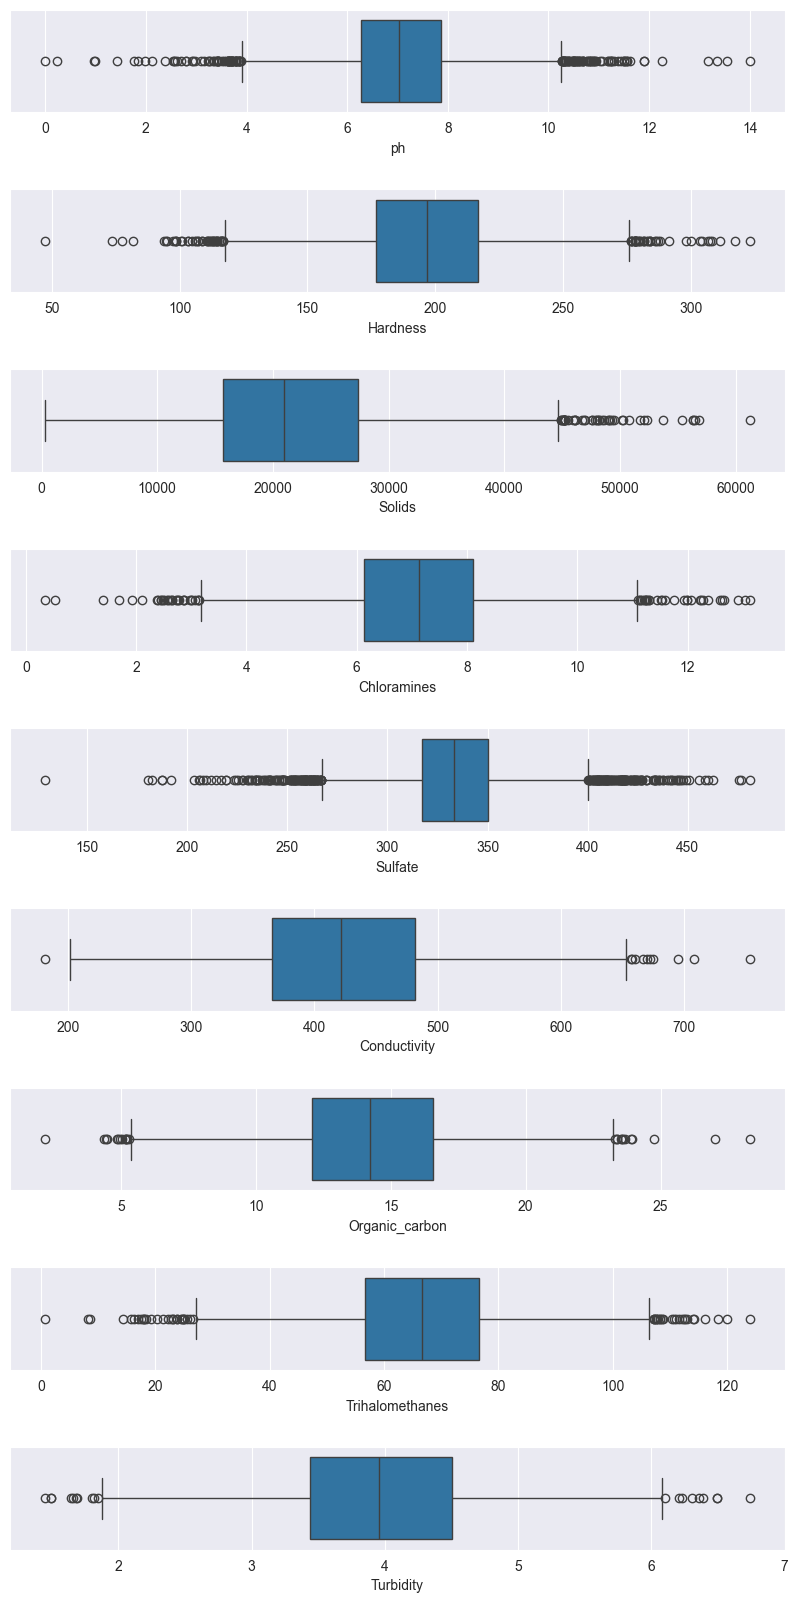

In [12]:
fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
for i in range(9) :
    sns.boxplot(x=(df.columns)[i], data=df, ax=ax[i])

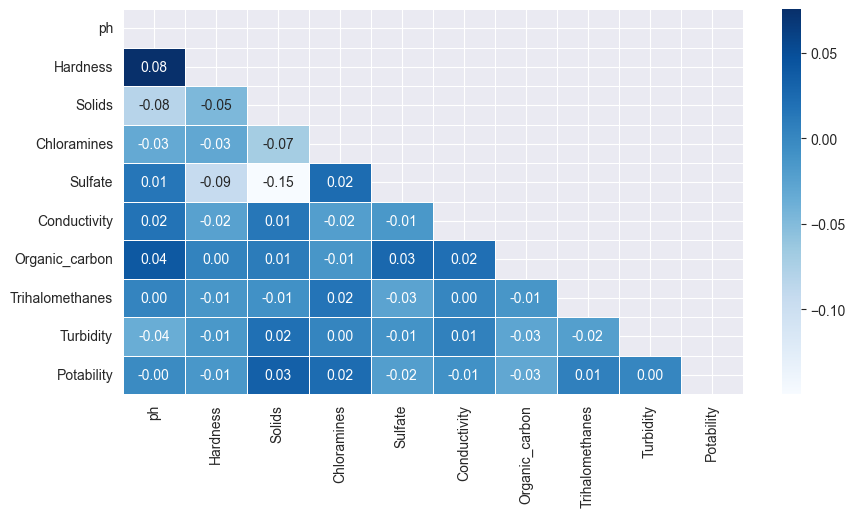

In [13]:
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

There are not many outliers in our dataset.
There is also no logical correlation between features.


## Data Pre-processing

In [14]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
for i in range(2):
    print(f"Potability == {i}")
    print(df[df.Potability == i][['ph', 'Sulfate','Trihalomethanes']].median())
    print("-----------------------------")

Potability == 0
ph                   7.036752
Sulfate            333.073546
Trihalomethanes     66.622485
dtype: float64
-----------------------------
Potability == 1
ph                   7.036752
Sulfate            333.073546
Trihalomethanes     66.622485
dtype: float64
-----------------------------


In [16]:
X = df.drop(columns='Potability')
y = df.Potability

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
ph,0.000000,0.505300,0.105003,1.000000
Hardness,0.000000,0.540231,0.119263,1.000000
Solids,0.000000,0.356173,0.143968,1.000000
Chloramines,0.000000,0.529963,0.123921,1.000000
Sulfate,0.000000,0.581223,0.102672,1.000000
Conductivity,0.000000,0.427940,0.141336,1.000000
Organic_carbon,0.000000,0.463026,0.126750,1.000000
Trihalomethanes,0.000000,0.532763,0.127939,1.000000
Turbidity,0.000000,0.475853,0.147548,1.000000


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.2)

In [49]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6280487804878049


In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(f"Accuracy:{accuracy_score(y_pred,y_test)}")

Accuracy:0.6905487804878049


In [51]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.63


In [52]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(f"Accuracy:{accuracy_score(y_pred,y_test)}")

Accuracy:0.6158536585365854


In [53]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(f"Accuracy:{accuracy_score(y_pred,y_test)}")

Accuracy:0.6509146341463414


In [56]:
from sklearn.model_selection import cross_val_score
def train_and_save_best_model(X_train, X_test, y_train, y_test):
    models = {
        'LogisticRegression': LogisticRegression(),
        'RandomForestClassifier': RandomForestClassifier(),
        'SVM': svm.SVC(kernel='rbf'),
        'GaussianNB': GaussianNB(),
        'AdaBoostClassifier': AdaBoostClassifier()
    }

    best_model = None
    best_accuracy = 0

    for name, model in models.items():
        print(f"Training {name}...")
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        mean_accuracy = scores.mean()
        print(f"{name} Cross-Validation Accuracy: {mean_accuracy:.2f}")

        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_model = model
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_pred)
            print(f"{name} Test Accuracy: {test_accuracy:.2f}")

In [57]:
train_and_save_best_model(X_train, X_test, y_train, y_test)

Training LogisticRegression...
LogisticRegression Cross-Validation Accuracy: 0.61
LogisticRegression Test Accuracy: 0.63
Training RandomForestClassifier...
RandomForestClassifier Cross-Validation Accuracy: 0.66
RandomForestClassifier Test Accuracy: 0.69
Training SVM...
SVM Cross-Validation Accuracy: 0.61
Training GaussianNB...
GaussianNB Cross-Validation Accuracy: 0.62
Training AdaBoostClassifier...
AdaBoostClassifier Cross-Validation Accuracy: 0.61
